In [1]:
%matplotlib inline

from analysis.feature_extractor import FeatureExtractor
import pandas as pd
import essentia.standard as es
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
from madmom.features.onsets import CNNOnsetProcessor, peak_picking

In [3]:
low_level_keys = [
    'barkband_1', 'barkband_2','barkband_3','barkband_4', 'barkband_5', 
    'barkband_6', 'barkband_7', 'barkband_8', 'barkband_9', 'barkband_10',
    'barkband_11', 'barkband_12','barkband_13','barkband_14', 'barkband_15', 
    'barkband_16', 'barkband_17', 'barkband_18', 'barkband_19', 'barkband_20',
    'barkband_21', 'barkband_22','barkband_23','barkband_24', 'barkband_25', 
    'barkband_26', 'barkband_27',
    'barkbands_kurtosis',
    'barkbands_skewness',
    'barkbands_spread',
    'hfc',
    'mfcc_1', 'mfcc_2', 'mfcc_3','mfcc_4','mfcc_5','mfcc_6', 
    'mfcc_7','mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13',
    'pitch',
    'pitch_instantaneous_confidence',
    'pitch_salience',
    'silence_rate_20dB',
    'silence_rate_30dB',
    'silence_rate_60dB',
    'spectral_complexity',
    'spectral_crest',
    'spectral_decrease',
    'spectral_energy',
    'spectral_energyband_low',
    'spectral_energyband_middle_low',
    'spectral_energyband_middle_high',
    'spectral_energyband_high',
    'spectral_flatness_db',
    'spectral_flux',
    'spectral_rms',
    'spectral_rolloff',
    'spectral_strongpeak',
    'zerocrossingrate',
    'inharmonicity',
    'tristimulus_1', 'tristimulus_2', 'tristimulus_3',
    'oddtoevenharmonicenergyratio']
#     'dissonance',
#     'sccoeffs',
#     'scvalleys'
#     'spectral_centroid',
#     'spectral_kurtosis',
#     'spectral_skewness',
#     'spectral_spread'
# ]

In [62]:
audio = es.MonoLoader(filename='Dataset/28.wav')()
audio_eqlLoud = es.EqualLoudness()(audio)

low_level_eql = es.LowLevelSpectralEqloudExtractor(frameSize=2048, hopSize=512)(audio_eqlLoud)

feats = es.LowLevelSpectralExtractor(frameSize=2048, hopSize=512)(audio)

In [63]:
onset_times = es.SuperFluxExtractor(frameSize=2048, hopSize=64)(audio)
onset_strength = CNNOnsetProcessor()(audio)
onset_frames = peak_picking(onset_strength, threshold=0.5)
frame_rate = len(audio)/len(onset_strength)
onset_times_cnn = onset_frames*frame_rate

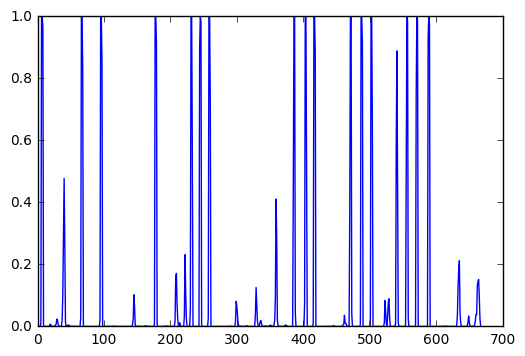

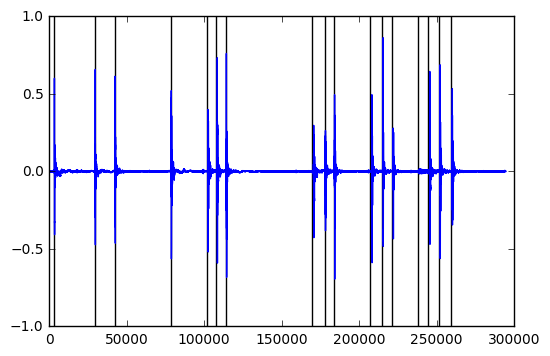

In [64]:
plt.figure()
# plt.vlines(onset_times*44100, -1, 1)
plt.plot(onset_strength)
plt.show()

plt.figure()
plt.vlines(onset_times_cnn, -1, 1)
plt.plot(audio)
plt.show()

In [65]:

def frame_feature(feature, onset_times, onset_end_times, frame_rate):
    
    
    return map(lambda x,y: np.mean(feature[int(np.ceil(x*frame_rate)):int(np.ceil(y*frame_rate))]), onset_times, onset_end_times)

In [66]:
frame_rate = 1/512.
onset_end_times = np.append(onset_times_cnn[1:], len(audio))

data = pd.DataFrame()


n_feat = 0
for items in feats:
    if any(isinstance(el, np.ndarray) for el in items):
        for i in items.T:
            feat = frame_feature(i, onset_times_cnn, onset_end_times, frame_rate)
            data[n_feat] = feat / max(feat)
            n_feat += 1
        
    else:
        feat = frame_feature(items, onset_times_cnn, onset_end_times, frame_rate)
        data[n_feat]  = feat / max(feat)
        n_feat += 1

In [67]:
data.columns = low_level_keys
data.index = range(1, len(onset_times_cnn)+1)

In [68]:
data = data.T.add_prefix('file_')
data.label = pd.Series(np.zeros(len(onset_times_cnn)))

In [69]:
data = data.T
data['label'] = 'ep'


In [70]:
data

,barkband_1,barkband_2,barkband_3,barkband_4,barkband_5,barkband_6,barkband_7,barkband_8,barkband_9,barkband_10,...,spectral_rms,spectral_rolloff,spectral_strongpeak,zerocrossingrate,inharmonicity,tristimulus_1,tristimulus_2,tristimulus_3,oddtoevenharmonicenergyratio,label
file_1,1.000000,0.126540,0.074835,0.046709,0.066065,0.149828,0.159131,0.045085,0.096319,0.050585,...,0.226963,0.144075,0.119139,0.219078,0.843725,0.352106,0.958813,0.923485,0.294772,ep
file_2,0.654761,0.278902,0.202580,0.143208,0.160944,0.188629,0.443098,0.358127,0.254673,0.208931,...,0.387704,0.075362,0.209062,0.166106,0.659786,0.589211,0.732720,0.826970,0.113619,ep
file_3,0.082530,0.135938,0.065639,0.064725,0.041942,0.119044,0.257223,0.077029,0.019843,0.028280,...,0.138977,0.222279,0.095051,0.362537,0.742078,0.402041,0.861994,0.944143,0.240087,ep
file_4,0.626503,0.387653,0.364925,0.346491,0.337787,0.266850,0.124082,0.010425,0.052434,0.021149,...,0.369262,0.128863,0.333082,0.192442,1.000000,0.484350,0.676228,1.000000,0.272893,ep
file_5,0.551879,0.975709,0.764609,1.000000,0.803811,0.158417,0.093767,0.087798,0.264818,0.189735,...,0.889707,0.053890,1.000000,0.134761,0.169614,1.000000,0.489567,0.536011,0.020649,ep
file_6,0.990040,1.000000,1.000000,0.876346,1.000000,0.478239,1.000000,0.527367,0.658441,0.592512,...,1.000000,0.113733,0.838124,0.169262,0.678012,0.538452,0.882646,0.763065,0.263293,ep
file_7,0.102614,0.108032,0.048850,0.053249,0.049419,0.138397,0.103493,0.022334,0.025749,0.041650,...,0.117678,0.201854,0.082574,0.301557,0.964715,0.355518,0.891666,0.975318,0.343411,ep
file_8,0.644157,0.498054,0.499731,0.361498,0.221764,0.243039,0.656845,0.167895,0.092965,0.043582,...,0.593697,0.086161,0.596193,0.187387,0.337587,0.806925,0.754139,0.547579,0.075775,ep
file_9,0.817880,0.417672,0.064286,0.028964,0.144125,0.247354,0.924269,0.502457,0.228863,1.000000,...,0.519737,0.134098,0.351033,0.194992,0.424519,0.614011,1.000000,0.574540,0.120487,ep
file_10,0.211971,0.231389,0.267751,0.268740,0.308731,0.093970,0.274559,0.102019,0.132781,0.083168,...,0.277198,0.165230,0.234928,0.298394,0.640068,0.563902,0.734213,0.856131,0.189492,ep


In [72]:
import os

In [92]:
assert any(os.listdir(path)) is 'EP' or 'NEP', 'There must be a EP or NEP folder'

In [110]:
assert os.path.isdir(path+'EP') and os.path.isdir(path+'EP'), 'There must be a EP and NEP folders'

AssertionError: There must be a EP and NEP folders

In [102]:
print([a for a in os.listdir(path)])

['EP', '23.wav', '19.wav', '27.wav', '6.wav', '16 (ruido).wav', '38.wav', '5.wav', '14 (ruido).wav', 'NEP', '4.wav', '17.wav', '40.wav', '25.wav', '37.wav', '1.wav', '35.wav', '12.wav', '39.wav', '28.wav', '24.wav', '3.wav', '8.wav', '10.wav', '11.wav', '34.wav', '30.wav', '18.wav', '13.wav', '42.wav', '9 (ruidoso).wav', '15.wav', '26.wav', '21.wav', '41.wav', '32.wav', '31(ruido).wav', '20.wav', '2.wav', '36.wav', '33.wav', '22.wav']
